import necessary libraries

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
from tqdm import tqdm


load and process dataset

In [53]:

# Parameters
IMG_SIZE = 256
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Animals"
LABEL_MAP = {'cats': 0, 'dogs': 1, 'pandas': 2}


In [54]:
def load_dataset(folder_path):
    dataset = []
    for category in os.listdir(folder_path):
        class_index = LABEL_MAP[category]  # Use fixed label mapping
        path = os.path.join(folder_path, category)
        for img_file in tqdm(os.listdir(path), desc=f"Loading {category}"):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0  # Normalize
            dataset.append([img, class_index])
    return dataset

data = load_dataset(DATA_PATH)
random.shuffle(data)
print("Total samples:", len(data))



Loading pandas: 100%|██████████| 101/101 [00:01<00:00, 75.16it/s]

Total samples: 301


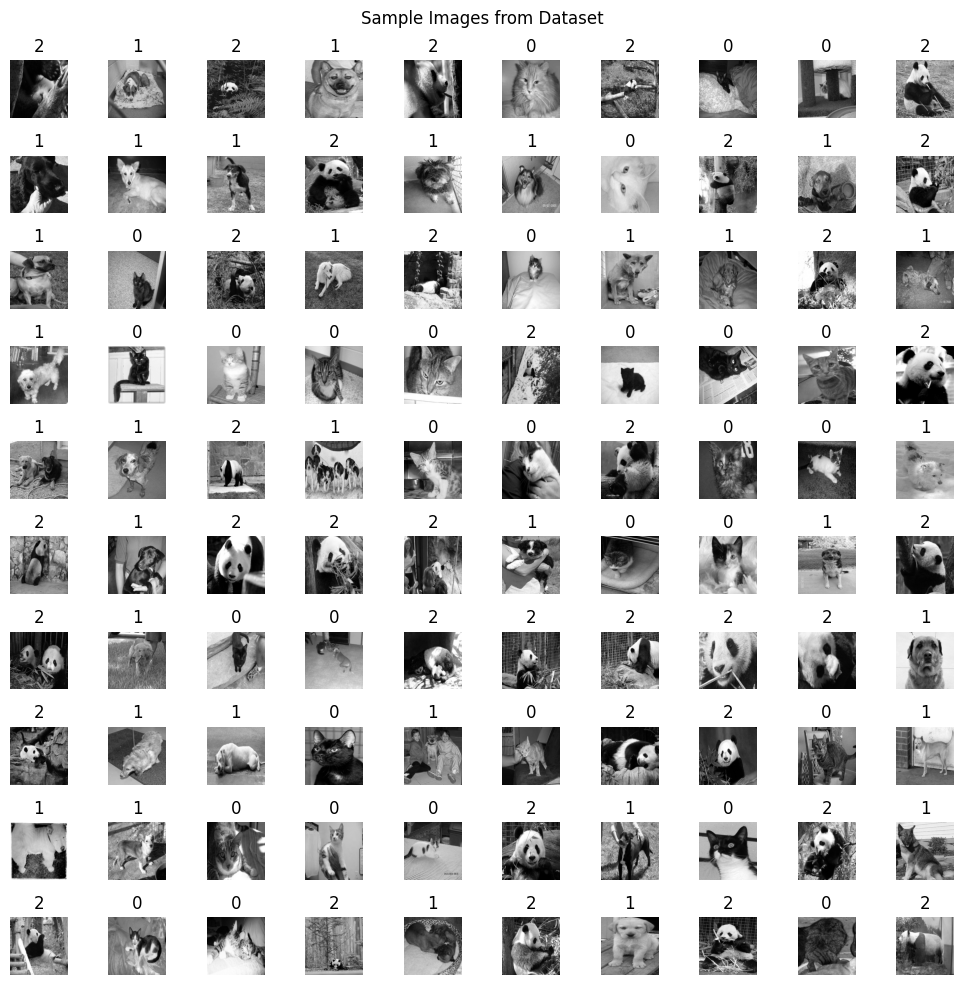

In [55]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(data[i][0], cmap='gray')
    plt.axis('off')
    plt.title(data[i][1])
plt.suptitle("Sample Images from Dataset")
plt.tight_layout()
plt.show()


In [56]:
def split_folds(data, n_folds=5):
    fold_size = len(data) // n_folds
    return [data[i*fold_size:(i+1)*fold_size] for i in range(n_folds)]

folds = split_folds(data, n_folds=5)


In [57]:
def l2_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(train_data, test_img, k):
    distances = []
    for t_img, t_label in train_data:
        dist = l2_distance(t_img, test_img)
        distances.append((dist, t_label))

    distances.sort(key=lambda x: x[0])
    top_k_labels = [label for _, label in distances[:k]]
    prediction = Counter(top_k_labels).most_common(1)[0][0]
    return prediction


In [58]:
K = list(range(1, 31))
fold_accuracies_l2 = [[] for _ in range(len(folds))]

for i in range(len(folds)):
    print(f"\nValidating on Fold {i+1}")
    validation = folds[i]
    training = sum([folds[j] for j in range(len(folds)) if j != i], [])

    for k in K:
        correct = 0
        for v_img, v_label in tqdm(validation, desc=f"k={k}"):
            prediction = knn_predict(training, v_img, k)
            if prediction == v_label:
                correct += 1

        acc = (correct / len(validation)) * 100
        fold_accuracies_l2[i].append(acc)
        print(f"Fold {i+1}, k={k}, Accuracy: {acc:.2f}%")



Validating on Fold 1


k=1: 100%|██████████| 60/60 [00:02<00:00, 27.25it/s]


Fold 1, k=1, Accuracy: 45.00%


k=2: 100%|██████████| 60/60 [00:02<00:00, 26.95it/s]


Fold 1, k=2, Accuracy: 45.00%


k=3: 100%|██████████| 60/60 [00:02<00:00, 25.25it/s]


Fold 1, k=3, Accuracy: 46.67%


k=4: 100%|██████████| 60/60 [00:03<00:00, 18.26it/s]


Fold 1, k=4, Accuracy: 45.00%


k=5: 100%|██████████| 60/60 [00:02<00:00, 24.99it/s]


Fold 1, k=5, Accuracy: 46.67%


k=6: 100%|██████████| 60/60 [00:02<00:00, 26.46it/s]


Fold 1, k=6, Accuracy: 41.67%


k=7: 100%|██████████| 60/60 [00:02<00:00, 27.73it/s]


Fold 1, k=7, Accuracy: 46.67%


k=8: 100%|██████████| 60/60 [00:02<00:00, 23.01it/s]


Fold 1, k=8, Accuracy: 43.33%


k=9: 100%|██████████| 60/60 [00:02<00:00, 22.02it/s]


Fold 1, k=9, Accuracy: 53.33%


k=10: 100%|██████████| 60/60 [00:03<00:00, 18.68it/s]


Fold 1, k=10, Accuracy: 56.67%


k=11: 100%|██████████| 60/60 [00:02<00:00, 27.71it/s]


Fold 1, k=11, Accuracy: 55.00%


k=12: 100%|██████████| 60/60 [00:02<00:00, 27.76it/s]


Fold 1, k=12, Accuracy: 50.00%


k=13: 100%|██████████| 60/60 [00:02<00:00, 27.19it/s]


Fold 1, k=13, Accuracy: 50.00%


k=14: 100%|██████████| 60/60 [00:02<00:00, 27.93it/s]


Fold 1, k=14, Accuracy: 48.33%


k=15: 100%|██████████| 60/60 [00:02<00:00, 21.33it/s]


Fold 1, k=15, Accuracy: 48.33%


k=16: 100%|██████████| 60/60 [00:03<00:00, 19.53it/s]


Fold 1, k=16, Accuracy: 50.00%


k=17: 100%|██████████| 60/60 [00:02<00:00, 27.50it/s]


Fold 1, k=17, Accuracy: 48.33%


k=18: 100%|██████████| 60/60 [00:02<00:00, 27.61it/s]


Fold 1, k=18, Accuracy: 50.00%


k=19: 100%|██████████| 60/60 [00:02<00:00, 27.15it/s]


Fold 1, k=19, Accuracy: 46.67%


k=20: 100%|██████████| 60/60 [00:02<00:00, 27.64it/s]


Fold 1, k=20, Accuracy: 46.67%


k=21: 100%|██████████| 60/60 [00:02<00:00, 20.73it/s]


Fold 1, k=21, Accuracy: 45.00%


k=22: 100%|██████████| 60/60 [00:03<00:00, 19.69it/s]


Fold 1, k=22, Accuracy: 45.00%


k=23: 100%|██████████| 60/60 [00:02<00:00, 27.03it/s]


Fold 1, k=23, Accuracy: 46.67%


k=24: 100%|██████████| 60/60 [00:02<00:00, 27.73it/s]


Fold 1, k=24, Accuracy: 50.00%


k=25: 100%|██████████| 60/60 [00:02<00:00, 27.57it/s]


Fold 1, k=25, Accuracy: 45.00%


k=26: 100%|██████████| 60/60 [00:02<00:00, 26.99it/s]


Fold 1, k=26, Accuracy: 41.67%


k=27: 100%|██████████| 60/60 [00:02<00:00, 20.01it/s]


Fold 1, k=27, Accuracy: 41.67%


k=28: 100%|██████████| 60/60 [00:02<00:00, 20.41it/s]


Fold 1, k=28, Accuracy: 45.00%


k=29: 100%|██████████| 60/60 [00:02<00:00, 27.56it/s]


Fold 1, k=29, Accuracy: 43.33%


k=30: 100%|██████████| 60/60 [00:02<00:00, 27.83it/s]


Fold 1, k=30, Accuracy: 40.00%

Validating on Fold 2


k=1: 100%|██████████| 60/60 [00:02<00:00, 27.05it/s]


Fold 2, k=1, Accuracy: 35.00%


k=2: 100%|██████████| 60/60 [00:02<00:00, 27.59it/s]


Fold 2, k=2, Accuracy: 35.00%


k=3: 100%|██████████| 60/60 [00:03<00:00, 19.84it/s]


Fold 2, k=3, Accuracy: 30.00%


k=4: 100%|██████████| 60/60 [00:02<00:00, 20.98it/s]


Fold 2, k=4, Accuracy: 28.33%


k=5: 100%|██████████| 60/60 [00:02<00:00, 27.45it/s]


Fold 2, k=5, Accuracy: 35.00%


k=6: 100%|██████████| 60/60 [00:02<00:00, 27.07it/s]


Fold 2, k=6, Accuracy: 30.00%


k=7: 100%|██████████| 60/60 [00:02<00:00, 27.46it/s]


Fold 2, k=7, Accuracy: 33.33%


k=8: 100%|██████████| 60/60 [00:02<00:00, 26.96it/s]


Fold 2, k=8, Accuracy: 31.67%


k=9: 100%|██████████| 60/60 [00:03<00:00, 19.33it/s]


Fold 2, k=9, Accuracy: 31.67%


k=10: 100%|██████████| 60/60 [00:02<00:00, 21.17it/s]


Fold 2, k=10, Accuracy: 28.33%


k=11: 100%|██████████| 60/60 [00:02<00:00, 27.51it/s]


Fold 2, k=11, Accuracy: 31.67%


k=12: 100%|██████████| 60/60 [00:02<00:00, 27.56it/s]


Fold 2, k=12, Accuracy: 25.00%


k=13: 100%|██████████| 60/60 [00:02<00:00, 27.60it/s]


Fold 2, k=13, Accuracy: 31.67%


k=14: 100%|██████████| 60/60 [00:02<00:00, 27.47it/s]


Fold 2, k=14, Accuracy: 30.00%


k=15: 100%|██████████| 60/60 [00:03<00:00, 19.16it/s]


Fold 2, k=15, Accuracy: 35.00%


k=16: 100%|██████████| 60/60 [00:02<00:00, 21.64it/s]


Fold 2, k=16, Accuracy: 30.00%


k=17: 100%|██████████| 60/60 [00:02<00:00, 27.73it/s]


Fold 2, k=17, Accuracy: 33.33%


k=18: 100%|██████████| 60/60 [00:02<00:00, 27.28it/s]


Fold 2, k=18, Accuracy: 26.67%


k=19: 100%|██████████| 60/60 [00:02<00:00, 27.77it/s]


Fold 2, k=19, Accuracy: 30.00%


k=20: 100%|██████████| 60/60 [00:02<00:00, 26.86it/s]


Fold 2, k=20, Accuracy: 28.33%


k=21: 100%|██████████| 60/60 [00:03<00:00, 18.57it/s]


Fold 2, k=21, Accuracy: 28.33%


k=22: 100%|██████████| 60/60 [00:02<00:00, 22.23it/s]


Fold 2, k=22, Accuracy: 25.00%


k=23: 100%|██████████| 60/60 [00:02<00:00, 27.60it/s]


Fold 2, k=23, Accuracy: 35.00%


k=24: 100%|██████████| 60/60 [00:02<00:00, 27.51it/s]


Fold 2, k=24, Accuracy: 26.67%


k=25: 100%|██████████| 60/60 [00:02<00:00, 27.72it/s]


Fold 2, k=25, Accuracy: 35.00%


k=26: 100%|██████████| 60/60 [00:02<00:00, 27.63it/s]


Fold 2, k=26, Accuracy: 33.33%


k=27: 100%|██████████| 60/60 [00:03<00:00, 18.07it/s]


Fold 2, k=27, Accuracy: 36.67%


k=28: 100%|██████████| 60/60 [00:02<00:00, 22.88it/s]


Fold 2, k=28, Accuracy: 26.67%


k=29: 100%|██████████| 60/60 [00:02<00:00, 27.81it/s]


Fold 2, k=29, Accuracy: 35.00%


k=30: 100%|██████████| 60/60 [00:02<00:00, 27.65it/s]


Fold 2, k=30, Accuracy: 33.33%

Validating on Fold 3


k=1: 100%|██████████| 60/60 [00:02<00:00, 27.45it/s]


Fold 3, k=1, Accuracy: 43.33%


k=2: 100%|██████████| 60/60 [00:02<00:00, 27.38it/s]


Fold 3, k=2, Accuracy: 43.33%


k=3: 100%|██████████| 60/60 [00:03<00:00, 18.28it/s]


Fold 3, k=3, Accuracy: 43.33%


k=4: 100%|██████████| 60/60 [00:02<00:00, 23.10it/s]


Fold 3, k=4, Accuracy: 41.67%


k=5: 100%|██████████| 60/60 [00:02<00:00, 27.43it/s]


Fold 3, k=5, Accuracy: 41.67%


k=6: 100%|██████████| 60/60 [00:02<00:00, 27.50it/s]


Fold 3, k=6, Accuracy: 41.67%


k=7: 100%|██████████| 60/60 [00:02<00:00, 27.78it/s]


Fold 3, k=7, Accuracy: 48.33%


k=8: 100%|██████████| 60/60 [00:02<00:00, 25.58it/s]


Fold 3, k=8, Accuracy: 41.67%


k=9: 100%|██████████| 60/60 [00:03<00:00, 18.25it/s]


Fold 3, k=9, Accuracy: 43.33%


k=10: 100%|██████████| 60/60 [00:02<00:00, 23.68it/s]


Fold 3, k=10, Accuracy: 41.67%


k=11: 100%|██████████| 60/60 [00:02<00:00, 27.30it/s]


Fold 3, k=11, Accuracy: 43.33%


k=12: 100%|██████████| 60/60 [00:02<00:00, 27.77it/s]


Fold 3, k=12, Accuracy: 38.33%


k=13: 100%|██████████| 60/60 [00:02<00:00, 27.56it/s]


Fold 3, k=13, Accuracy: 41.67%


k=14: 100%|██████████| 60/60 [00:02<00:00, 24.65it/s]


Fold 3, k=14, Accuracy: 40.00%


k=15: 100%|██████████| 60/60 [00:03<00:00, 18.17it/s]


Fold 3, k=15, Accuracy: 38.33%


k=16: 100%|██████████| 60/60 [00:02<00:00, 24.93it/s]


Fold 3, k=16, Accuracy: 41.67%


k=17: 100%|██████████| 60/60 [00:02<00:00, 27.54it/s]


Fold 3, k=17, Accuracy: 43.33%


k=18: 100%|██████████| 60/60 [00:02<00:00, 27.03it/s]


Fold 3, k=18, Accuracy: 45.00%


k=19: 100%|██████████| 60/60 [00:02<00:00, 27.65it/s]


Fold 3, k=19, Accuracy: 41.67%


k=20: 100%|██████████| 60/60 [00:02<00:00, 23.79it/s]


Fold 3, k=20, Accuracy: 38.33%


k=21: 100%|██████████| 60/60 [00:03<00:00, 18.39it/s]


Fold 3, k=21, Accuracy: 43.33%


k=22: 100%|██████████| 60/60 [00:02<00:00, 25.41it/s]


Fold 3, k=22, Accuracy: 41.67%


k=23: 100%|██████████| 60/60 [00:02<00:00, 27.43it/s]


Fold 3, k=23, Accuracy: 41.67%


k=24: 100%|██████████| 60/60 [00:02<00:00, 27.51it/s]


Fold 3, k=24, Accuracy: 41.67%


k=25: 100%|██████████| 60/60 [00:02<00:00, 27.42it/s]


Fold 3, k=25, Accuracy: 41.67%


k=26: 100%|██████████| 60/60 [00:02<00:00, 23.43it/s]


Fold 3, k=26, Accuracy: 40.00%


k=27: 100%|██████████| 60/60 [00:03<00:00, 18.67it/s]


Fold 3, k=27, Accuracy: 43.33%


k=28: 100%|██████████| 60/60 [00:02<00:00, 26.06it/s]


Fold 3, k=28, Accuracy: 43.33%


k=29: 100%|██████████| 60/60 [00:02<00:00, 27.29it/s]


Fold 3, k=29, Accuracy: 40.00%


k=30: 100%|██████████| 60/60 [00:02<00:00, 27.19it/s]


Fold 3, k=30, Accuracy: 38.33%

Validating on Fold 4


k=1: 100%|██████████| 60/60 [00:02<00:00, 27.37it/s]


Fold 4, k=1, Accuracy: 28.33%


k=2: 100%|██████████| 60/60 [00:02<00:00, 23.09it/s]


Fold 4, k=2, Accuracy: 28.33%


k=3: 100%|██████████| 60/60 [00:03<00:00, 18.02it/s]


Fold 4, k=3, Accuracy: 26.67%


k=4: 100%|██████████| 60/60 [00:02<00:00, 26.38it/s]


Fold 4, k=4, Accuracy: 30.00%


k=5: 100%|██████████| 60/60 [00:02<00:00, 27.47it/s]


Fold 4, k=5, Accuracy: 33.33%


k=6: 100%|██████████| 60/60 [00:02<00:00, 27.39it/s]


Fold 4, k=6, Accuracy: 38.33%


k=7: 100%|██████████| 60/60 [00:02<00:00, 27.37it/s]


Fold 4, k=7, Accuracy: 35.00%


k=8: 100%|██████████| 60/60 [00:02<00:00, 22.43it/s]


Fold 4, k=8, Accuracy: 35.00%


k=9: 100%|██████████| 60/60 [00:03<00:00, 18.29it/s]


Fold 4, k=9, Accuracy: 40.00%


k=10: 100%|██████████| 60/60 [00:02<00:00, 27.39it/s]


Fold 4, k=10, Accuracy: 26.67%


k=11: 100%|██████████| 60/60 [00:02<00:00, 27.48it/s]


Fold 4, k=11, Accuracy: 25.00%


k=12: 100%|██████████| 60/60 [00:02<00:00, 27.47it/s]


Fold 4, k=12, Accuracy: 25.00%


k=13: 100%|██████████| 60/60 [00:02<00:00, 27.12it/s]


Fold 4, k=13, Accuracy: 26.67%


k=14: 100%|██████████| 60/60 [00:02<00:00, 21.40it/s]


Fold 4, k=14, Accuracy: 30.00%


k=15: 100%|██████████| 60/60 [00:03<00:00, 19.15it/s]


Fold 4, k=15, Accuracy: 33.33%


k=16: 100%|██████████| 60/60 [00:02<00:00, 27.39it/s]


Fold 4, k=16, Accuracy: 31.67%


k=17: 100%|██████████| 60/60 [00:02<00:00, 27.05it/s]


Fold 4, k=17, Accuracy: 33.33%


k=18: 100%|██████████| 60/60 [00:02<00:00, 27.40it/s]


Fold 4, k=18, Accuracy: 31.67%


k=19: 100%|██████████| 60/60 [00:02<00:00, 27.39it/s]


Fold 4, k=19, Accuracy: 35.00%


k=20: 100%|██████████| 60/60 [00:02<00:00, 20.78it/s]


Fold 4, k=20, Accuracy: 31.67%


k=21: 100%|██████████| 60/60 [00:03<00:00, 19.83it/s]


Fold 4, k=21, Accuracy: 35.00%


k=22: 100%|██████████| 60/60 [00:02<00:00, 27.27it/s]


Fold 4, k=22, Accuracy: 35.00%


k=23: 100%|██████████| 60/60 [00:02<00:00, 27.31it/s]


Fold 4, k=23, Accuracy: 35.00%


k=24: 100%|██████████| 60/60 [00:02<00:00, 27.51it/s]


Fold 4, k=24, Accuracy: 30.00%


k=25: 100%|██████████| 60/60 [00:02<00:00, 27.19it/s]


Fold 4, k=25, Accuracy: 38.33%


k=26: 100%|██████████| 60/60 [00:02<00:00, 20.02it/s]


Fold 4, k=26, Accuracy: 38.33%


k=27: 100%|██████████| 60/60 [00:02<00:00, 20.04it/s]


Fold 4, k=27, Accuracy: 40.00%


k=28: 100%|██████████| 60/60 [00:02<00:00, 27.15it/s]


Fold 4, k=28, Accuracy: 40.00%


k=29: 100%|██████████| 60/60 [00:02<00:00, 26.64it/s]


Fold 4, k=29, Accuracy: 38.33%


k=30: 100%|██████████| 60/60 [00:02<00:00, 27.49it/s]


Fold 4, k=30, Accuracy: 40.00%

Validating on Fold 5


k=1: 100%|██████████| 60/60 [00:02<00:00, 27.58it/s]


Fold 5, k=1, Accuracy: 33.33%


k=2: 100%|██████████| 60/60 [00:03<00:00, 19.58it/s]


Fold 5, k=2, Accuracy: 33.33%


k=3: 100%|██████████| 60/60 [00:02<00:00, 20.86it/s]


Fold 5, k=3, Accuracy: 38.33%


k=4: 100%|██████████| 60/60 [00:02<00:00, 27.46it/s]


Fold 5, k=4, Accuracy: 28.33%


k=5: 100%|██████████| 60/60 [00:02<00:00, 27.62it/s]


Fold 5, k=5, Accuracy: 31.67%


k=6: 100%|██████████| 60/60 [00:02<00:00, 27.55it/s]


Fold 5, k=6, Accuracy: 30.00%


k=7: 100%|██████████| 60/60 [00:02<00:00, 27.76it/s]


Fold 5, k=7, Accuracy: 31.67%


k=8: 100%|██████████| 60/60 [00:03<00:00, 19.41it/s]


Fold 5, k=8, Accuracy: 26.67%


k=9: 100%|██████████| 60/60 [00:02<00:00, 20.77it/s]


Fold 5, k=9, Accuracy: 33.33%


k=10: 100%|██████████| 60/60 [00:02<00:00, 27.29it/s]


Fold 5, k=10, Accuracy: 33.33%


k=11: 100%|██████████| 60/60 [00:02<00:00, 27.30it/s]


Fold 5, k=11, Accuracy: 33.33%


k=12: 100%|██████████| 60/60 [00:02<00:00, 27.33it/s]


Fold 5, k=12, Accuracy: 33.33%


k=13: 100%|██████████| 60/60 [00:02<00:00, 27.16it/s]


Fold 5, k=13, Accuracy: 36.67%


k=14: 100%|██████████| 60/60 [00:03<00:00, 18.93it/s]


Fold 5, k=14, Accuracy: 30.00%


k=15: 100%|██████████| 60/60 [00:02<00:00, 21.42it/s]


Fold 5, k=15, Accuracy: 33.33%


k=16: 100%|██████████| 60/60 [00:02<00:00, 27.57it/s]


Fold 5, k=16, Accuracy: 31.67%


k=17: 100%|██████████| 60/60 [00:02<00:00, 27.52it/s]


Fold 5, k=17, Accuracy: 36.67%


k=18: 100%|██████████| 60/60 [00:02<00:00, 27.47it/s]


Fold 5, k=18, Accuracy: 41.67%


k=19: 100%|██████████| 60/60 [00:02<00:00, 27.50it/s]


Fold 5, k=19, Accuracy: 36.67%


k=20: 100%|██████████| 60/60 [00:03<00:00, 18.76it/s]


Fold 5, k=20, Accuracy: 38.33%


k=21: 100%|██████████| 60/60 [00:02<00:00, 21.37it/s]


Fold 5, k=21, Accuracy: 35.00%


k=22: 100%|██████████| 60/60 [00:02<00:00, 27.70it/s]


Fold 5, k=22, Accuracy: 35.00%


k=23: 100%|██████████| 60/60 [00:02<00:00, 27.14it/s]


Fold 5, k=23, Accuracy: 31.67%


k=24: 100%|██████████| 60/60 [00:02<00:00, 27.38it/s]


Fold 5, k=24, Accuracy: 33.33%


k=25: 100%|██████████| 60/60 [00:02<00:00, 27.13it/s]


Fold 5, k=25, Accuracy: 28.33%


k=26: 100%|██████████| 60/60 [00:03<00:00, 18.46it/s]


Fold 5, k=26, Accuracy: 30.00%


k=27: 100%|██████████| 60/60 [00:02<00:00, 22.37it/s]


Fold 5, k=27, Accuracy: 31.67%


k=28: 100%|██████████| 60/60 [00:02<00:00, 27.46it/s]


Fold 5, k=28, Accuracy: 33.33%


k=29: 100%|██████████| 60/60 [00:02<00:00, 26.89it/s]


Fold 5, k=29, Accuracy: 28.33%


k=30: 100%|██████████| 60/60 [00:02<00:00, 27.15it/s]

Fold 5, k=30, Accuracy: 30.00%


In [59]:
# Convert to NumPy arrays
fold_accuracies_l2_np = [np.array(fold) for fold in fold_accuracies_l2]

# Compute average accuracy for each k
avg_accuracy_l2 = [np.mean(k_set) for k_set in zip(*fold_accuracies_l2_np)]

# Optionally: print summary
print("\nAverage L2 Accuracy for each K:")
for k, acc in zip(K, avg_accuracy_l2):
    print(f"k = {k}: {acc:.2f}%")



Average L2 Accuracy for each K:
k = 1: 37.00%
k = 2: 37.00%
k = 3: 37.00%
k = 4: 34.67%
k = 5: 37.67%
k = 6: 36.33%
k = 7: 39.00%
k = 8: 35.67%
k = 9: 40.33%
k = 10: 37.33%
k = 11: 37.67%
k = 12: 34.33%
k = 13: 37.33%
k = 14: 35.67%
k = 15: 37.67%
k = 16: 37.00%
k = 17: 39.00%
k = 18: 39.00%
k = 19: 38.00%
k = 20: 36.67%
k = 21: 37.33%
k = 22: 36.33%
k = 23: 38.00%
k = 24: 36.33%
k = 25: 37.67%
k = 26: 36.67%
k = 27: 38.67%
k = 28: 37.67%
k = 29: 37.00%
k = 30: 36.33%


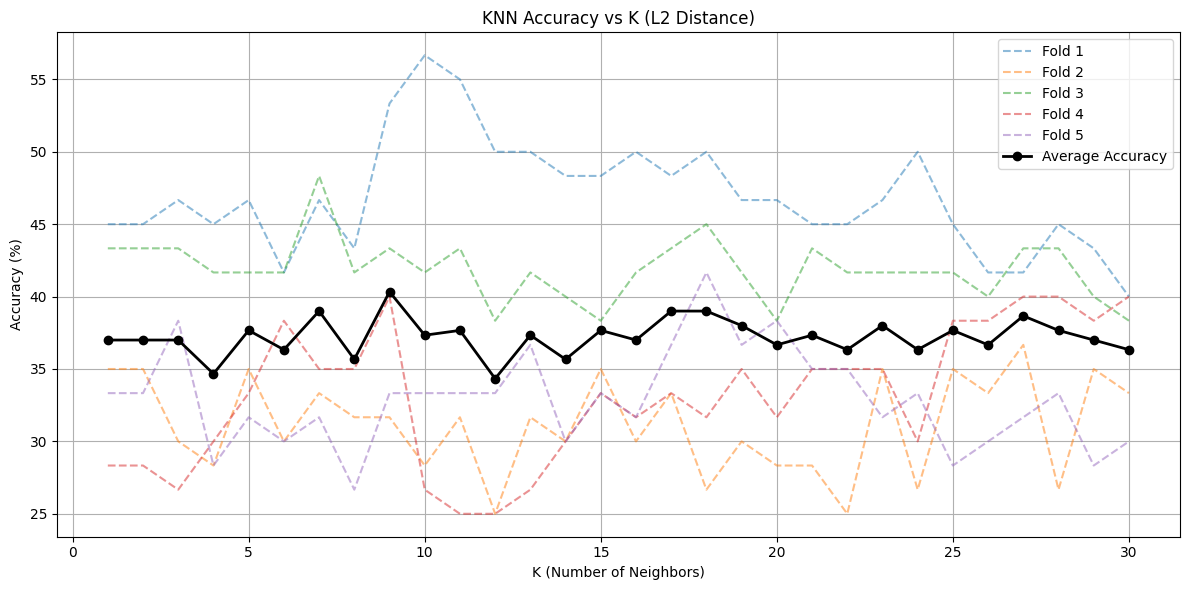

In [60]:
plt.figure(figsize=(12, 6))

# Plot each fold
for i, accs in enumerate(fold_accuracies_l2):
    plt.plot(K, accs, linestyle='--', alpha=0.5, label=f'Fold {i+1}')

# Plot average
plt.plot(K, avg_accuracy_l2, marker='o', color='black', linewidth=2, label='Average Accuracy')

plt.title("KNN Accuracy vs K (L2 Distance)")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


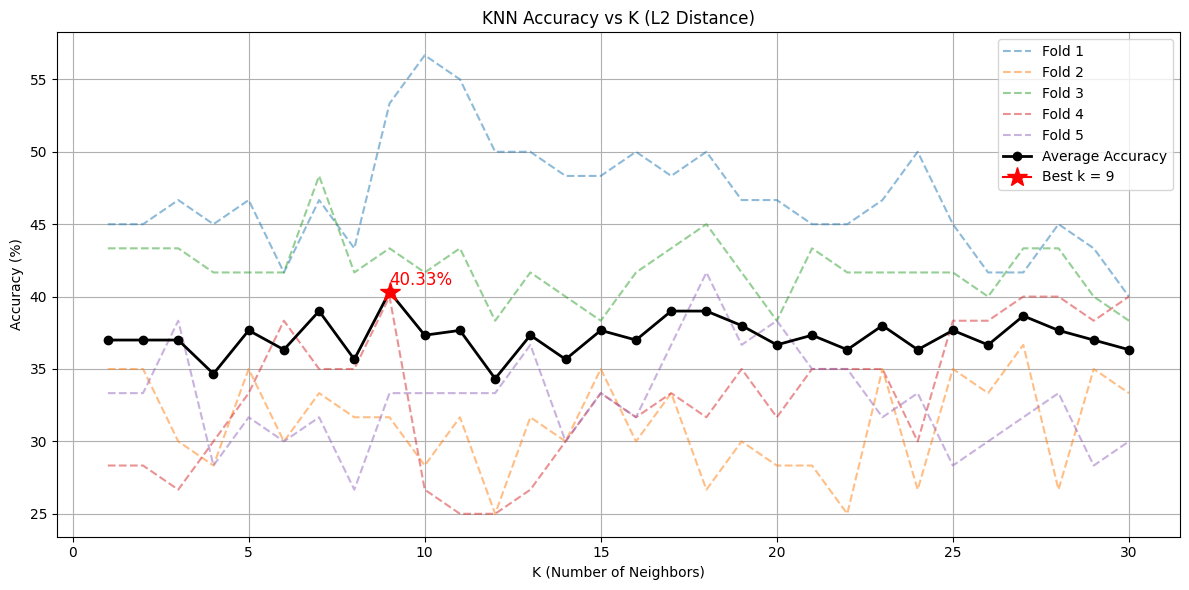

In [61]:
plt.figure(figsize=(12, 6))

# Plot accuracy for each fold
for i, accs in enumerate(fold_accuracies_l2):
    plt.plot(K, accs, linestyle='--', alpha=0.5, label=f'Fold {i+1}')

# Plot average accuracy across folds
plt.plot(K, avg_accuracy_l2, marker='o', color='black', linewidth=2, label='Average Accuracy')

# Highlight best k
best_k_index = np.argmax(avg_accuracy_l2)
best_k = K[best_k_index]
best_acc = avg_accuracy_l2[best_k_index]

plt.plot(best_k, best_acc, marker='*', color='red', markersize=15, label=f'Best k = {best_k}')
plt.annotate(f"{best_acc:.2f}%", (best_k, best_acc + 0.5), color='red', fontsize=12)

# Plot settings
plt.title("KNN Accuracy vs K (L2 Distance)")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
